In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../src")
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import Cubesat
from maneuvers import Maneuvers
import constants

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+230e3
ra = constants.Re+1000e3
Omega = 30*np.pi/180
i = 2*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat("3U")

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate(60*60*24*1,60,max_step=60)
maneuvers.addPerturbation("atmosphere")
maneuvers.propagate(60*60*24*200,60,max_step=60)
print("--Done--")

Propagating...from day  0.0  to  1.0
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  1.0  to  201.0
A termination event occurred. (Status Code: 1)

--Done--


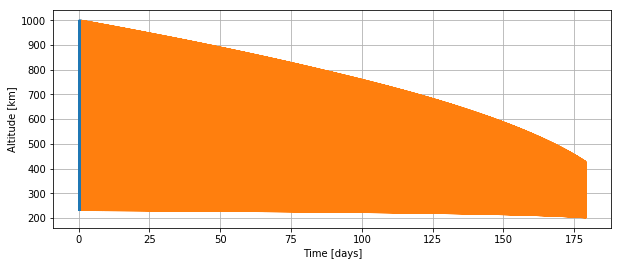

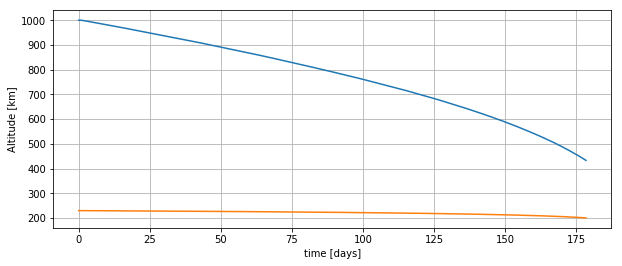

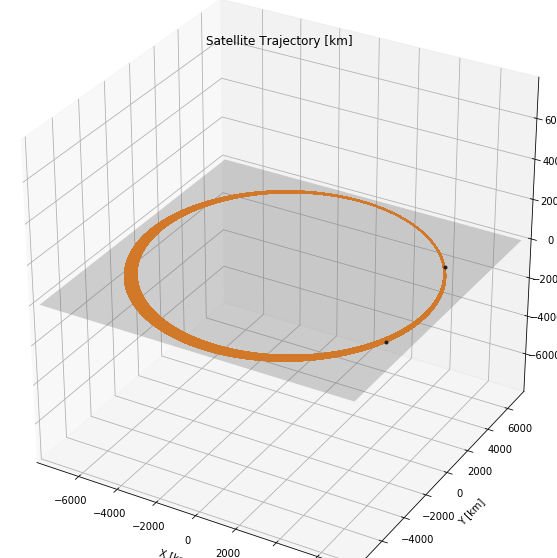

In [25]:
maneuvers.plot("singleItem", (np.linalg.norm(maneuvers.history.r,axis=1)-constants.Re)/1000)
plt.ylabel("Altitude [km]")
# CALCULATE PERIGEES AND APOGEES
perigees = (1-maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]
apogees = (1+maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]

plt.figure(figsize=(10,4))
plt.plot(maneuvers.history.t[:-2:1000]/60/60/24, (apogees[:-2:1000]-constants.Re)/1e3)
plt.plot(maneuvers.history.t[:-2:1000]/60/60/24, (perigees[:-2:1000]-constants.Re)/1e3)
plt.grid()
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")
maneuvers.plot("3d-trajectory");